# Network Intrusion Detection

In [1]:
%matplotlib inline

In [18]:
# to remove
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import pandas as pd

import experiments
import reporting

In [20]:
pd.set_option('display.max_columns', 200)

In [47]:
%%time
ni = experiments.NetworkIntrusionDetection()

CPU times: user 16.5 s, sys: 2.98 s, total: 19.5 s
Wall time: 6.82 s


In [48]:
ni.df.shape

(494021, 42)

## Dataset stats

In [38]:
%%time
ni.report_labels()

CPU times: user 338 ms, sys: 56.8 ms, total: 395 ms
Wall time: 394 ms


,attacks,prevalence,prevalence (overall),records
label,,,,
smurf.,280790,0.742697,0.568377,378068
neptune.,107201,0.524264,0.216997,204479
back.,2203,0.022145,0.004459,99481
satan.,1589,0.016072,0.003216,98867
ipsweep.,1247,0.012657,0.002524,98525
portsweep.,1040,0.010578,0.002105,98318
warezclient.,1020,0.010377,0.002065,98298
teardrop.,979,0.009964,0.001982,98257
pod.,264,0.002707,0.000534,97542


## Baseline and Oracle

In [8]:
%%time
df_baseline_oracle = ni.report_baseline_oracle()

CPU times: user 22.7 s, sys: 6.08 s, total: 28.7 s
Wall time: 17.9 s


In [9]:
df_baseline_oracle

,baseline_random_FN,baseline_random_FP,baseline_random_f1,baseline_random_precision,baseline_random_recall,baseline_unsupervised_FN,baseline_unsupervised_FP,baseline_unsupervised_f1,baseline_unsupervised_precision,baseline_unsupervised_recall,oracle_FN,oracle_FP,oracle_average precision,oracle_f1,oracle_precision,oracle_recall,oracle_roc auc,oracle_train time (s),prevalence
label,,,,,,,,,,,,,,,,,,,
smurf.,7186.5,7214.0,0.743104,0.743598,0.744061,19212,9728,0.379955,0.476849,0.315788,0,0,1.000000,1.000000,1.0,1.000000,1.000000,0.728290,0.742698
neptune.,5104.5,5080.5,0.525150,0.526556,0.523834,5485,5534,0.487226,0.486118,0.488340,1,0,1.000000,0.999953,1.0,0.999907,1.000000,0.478475,0.524266
back.,215.5,226.0,0.020227,0.020008,0.020455,202,180,0.086124,0.090909,0.081818,0,0,1.000000,1.000000,1.0,1.000000,1.000000,0.161669,0.022153
satan.,155.0,155.5,0.026016,0.026936,0.025157,13,16,0.909657,0.901235,0.918239,0,0,1.000000,1.000000,1.0,1.000000,1.000000,0.258113,0.016070
ipsweep.,123.5,122.5,0.011177,0.010597,0.012000,116,130,0.068182,0.064748,0.072000,0,0,1.000000,1.000000,1.0,1.000000,1.000000,0.142372,0.012649
portsweep.,103.0,97.5,0.009501,0.009390,0.009615,50,44,0.534653,0.551020,0.519231,1,0,0.990486,0.995169,1.0,0.990385,0.995188,0.160033,0.010578
warezclient.,101.0,103.0,0.009179,0.008637,0.009804,101,84,0.010695,0.011765,0.009804,2,0,0.999534,0.990099,1.0,0.980392,0.999997,0.244905,0.010377
teardrop.,97.0,97.0,0.009975,0.009756,0.010204,68,73,0.298507,0.291262,0.306122,0,0,1.000000,1.000000,1.0,1.000000,1.000000,0.141988,0.009961
pod.,26.0,26.0,0.000000,0.000000,0.000000,26,39,0.000000,0.000000,0.000000,1,0,1.000000,0.980392,1.0,0.961538,1.000000,0.140743,0.002717


In [10]:
df_baseline_oracle.mean().round(2)

baseline_random_FN                 1313.50
baseline_random_FP                 1314.50
baseline_random_f1                    0.14
baseline_random_precision             0.14
baseline_random_recall                0.14
baseline_unsupervised_FN           2528.40
baseline_unsupervised_FP           1584.00
baseline_unsupervised_f1              0.33
baseline_unsupervised_precision       0.34
baseline_unsupervised_recall          0.32
oracle_FN                             0.50
oracle_FP                             0.00
oracle_average precision              1.00
oracle_f1                             1.00
oracle_precision                      1.00
oracle_recall                         0.99
oracle_roc auc                        1.00
oracle_train time (s)                 0.26
prevalence                            0.14
dtype: float64

In [11]:
df_baseline_oracle.std().round(2)

baseline_random_FN                 2594.14
baseline_random_FP                 2596.90
baseline_random_f1                    0.27
baseline_random_precision             0.27
baseline_random_recall                0.27
baseline_unsupervised_FN           6104.01
baseline_unsupervised_FP           3337.23
baseline_unsupervised_f1              0.29
baseline_unsupervised_precision       0.30
baseline_unsupervised_recall          0.30
oracle_FN                             0.71
oracle_FP                             0.00
oracle_average precision              0.00
oracle_f1                             0.01
oracle_precision                      0.00
oracle_recall                         0.01
oracle_roc auc                        0.00
oracle_train time (s)                 0.19
prevalence                            0.27
dtype: float64

## Active Learning

In [49]:
df_active_learning = ni.report_active_learning()
df_active_learning

,initial_FN,initial_FP,initial_average precision,initial_f1,initial_precision,initial_recall,initial_roc auc,label,learner,query time (s),sample_100_FN,sample_100_FP,sample_100_average precision,sample_100_f1,sample_100_precision,sample_100_recall,sample_100_roc auc,sample_10_FN,sample_10_FP,sample_10_average precision,sample_10_f1,sample_10_precision,sample_10_recall,sample_10_roc auc,sample_1_FN,sample_1_FP,sample_1_average precision,sample_1_f1,sample_1_precision,sample_1_recall,sample_1_roc auc,sample_25_FN,sample_25_FP,sample_25_average precision,sample_25_f1,sample_25_precision,sample_25_recall,sample_25_roc auc,sample_50_FN,sample_50_FP,sample_50_average precision,sample_50_f1,sample_50_precision,sample_50_recall,sample_50_roc auc,sampling strategy,train time (s)
0,10,0,1.000000,0.999822,1.000000,0.999644,1.000000,smurf.,RandomForestClassifier,0.113536,12,0,1.000000,0.999786,1.000000,0.999573,1.000000,10,0,1.000000,0.999822,1.000000,0.999644,1.000000,10,0,1.000000,0.999822,1.000000,0.999644,1.000000,12,0,1.000000,0.999786,1.000000,0.999573,1.000000,12,0,1.000000,0.999786,1.000000,0.999573,1.000000,random_sampling,0.105282
1,10,0,1.000000,0.999822,1.000000,0.999644,1.000000,smurf.,RandomForestClassifier,0.111460,0,0,1.000000,1.000000,1.000000,1.000000,1.000000,0,0,1.000000,1.000000,1.000000,1.000000,1.000000,6,0,1.000000,0.999893,1.000000,0.999786,1.000000,0,0,1.000000,1.000000,1.000000,1.000000,1.000000,0,0,1.000000,1.000000,1.000000,1.000000,1.000000,entropy_sampling,0.109376
2,9,57,0.999997,0.998826,0.997973,0.999679,0.999991,smurf.,LogisticRegression,0.002383,9,6,0.999799,0.999733,0.999786,0.999679,0.999891,9,5,0.999998,0.999751,0.999822,0.999679,0.999995,9,67,0.999922,0.998648,0.997619,0.999679,0.999886,9,6,0.999798,0.999733,0.999786,0.999679,0.999890,9,4,0.999805,0.999768,0.999858,0.999679,0.999890,random_sampling,0.024312
3,9,57,0.999997,0.998826,0.997973,0.999679,0.999991,smurf.,LogisticRegression,0.002559,0,0,1.000000,1.000000,1.000000,1.000000,1.000000,1,7,1.000000,0.999858,0.999751,0.999964,1.000000,9,3,0.999818,0.999786,0.999893,0.999679,0.999888,1,5,0.999820,0.999893,0.999822,0.999964,0.999793,0,2,1.000000,0.999964,0.999929,1.000000,1.000000,entropy_sampling,0.026511
0,4,0,1.000000,0.999813,1.000000,0.999627,1.000000,neptune.,RandomForestClassifier,0.112695,3,0,1.000000,0.999860,1.000000,0.999720,1.000000,4,0,1.000000,0.999813,1.000000,0.999627,1.000000,4,0,1.000000,0.999813,1.000000,0.999627,1.000000,3,0,1.000000,0.999860,1.000000,0.999720,1.000000,3,0,1.000000,0.999860,1.000000,0.999720,1.000000,random_sampling,0.109523
1,4,0,1.000000,0.999813,1.000000,0.999627,1.000000,neptune.,RandomForestClassifier,0.112593,1,0,1.000000,0.999953,1.000000,0.999907,1.000000,1,0,1.000000,0.999953,1.000000,0.999907,1.000000,4,0,1.000000,0.999813,1.000000,0.999627,1.000000,1,0,1.000000,0.999953,1.000000,0.999907,1.000000,1,0,1.000000,0.999953,1.000000,0.999907,1.000000,entropy_sampling,0.108728
2,6,3,0.999993,0.999580,0.999720,0.999440,0.999992,neptune.,LogisticRegression,0.001880,6,2,0.999994,0.999627,0.999813,0.999440,0.999993,6,2,0.999994,0.999627,0.999813,0.999440,0.999993,6,2,0.999994,0.999627,0.999813,0.999440,0.999993,6,2,0.999993,0.999627,0.999813,0.999440,0.999992,5,1,0.999996,0.999720,0.999907,0.999534,0.999996,random_sampling,0.024976
3,6,3,0.999993,0.999580,0.999720,0.999440,0.999992,neptune.,LogisticRegression,0.002293,1,0,1.000000,0.999953,1.000000,0.999907,1.000000,6,8,0.999870,0.999347,0.999254,0.999440,0.999922,5,1,0.999996,0.999720,0.999907,0.999534,0.999995,2,0,1.000000,0.999907,1.000000,0.999813,1.000000,1,0,1.000000,0.999953,1.000000,0.999907,1.000000,entropy_sampling,0.026525
0,2,0,1.000000,0.995434,1.000000,0.990909,1.000000,back.,RandomForestClassifier,0.109122,2,0,1.000000,0.995434,1.000000,0.990909,1.000000,3,0,1.000000,0.993135,1.000000,0.986364,1.000000,2,0,1.000000,0.995434,1.000000,0.990909,1.000000,0,0,1.000000,1.000000,1.000000,1.000000,1.000000,0,0,1.000000,1.000000,1.000000,1.000000,1.000000

In [31]:
ni.report_active_learning_across_labels()

initial_FN        initial_FP         \
                                               mean    std       mean    std   
learner                sampling strategy                                       
LogisticRegression     entropy_sampling        20.2  29.86       14.8  17.18   
                       random_sampling         20.2  29.86       14.8  17.18   
RandomForestClassifier entropy_sampling         8.0   6.18        0.2   0.63   
                       random_sampling          8.0   6.18        0.2   0.63   

                                         initial_average precision        \
                                                              mean   std   
learner                sampling strategy                                   
LogisticRegression     entropy_sampling                       0.72  0.36   
                       random_sampling                        0.72  0.36   
RandomForestClassifier entropy_sampling                       0.97  0.05   
                       random_sampling                        0.97  0.05   

                                         initial_f1       initial_precision  \
                                               mean   std              mean   
learner                sampling strategy                                      
LogisticRegression     entropy_sampling        0.76  0.32              0.76   
                       random_sampling         0.76  0.32              0.76   
RandomForestClassifier entropy_sampling        0.94  0.07              1.00   
                       random_sampling         0.94  0.07              1.00   

                                               initial_recall        \
                                           std           mean   std   
learner                sampling strategy                              
LogisticRegression     entropy_sampling   0.33           0.76  0.31   
                       random_sampling    0.33           0.76  0.31   
RandomForestClassifier entropy_sampling   0.01           0.90  0.12   
                       random_sampling    0.01           0.90  0.12   

                                         initial_roc auc       query time (s)  \
                                                    mean   std           mean   
learner                sampling strategy                                        
LogisticRegression     entropy_sampling             0.97  0.04           0.00   
                       random_sampling              0.97  0.04           0.00   
RandomForestClassifier entropy_sampling             0.99  0.03           0.11   
                       random_sampling              0.99  0.03           0.11   

                                              sample_100_FN         \
                                          std          mean    std   
learner                sampling strategy                             
LogisticRegression     entropy_sampling   0.0           5.0   5.91   
                       random_sampling    0.0          23.7  30.27   
RandomForestClassifier entropy_sampling   0.0           1.2   1.81   
                       random_sampling    0.0           9.5   5.89   

                                         sample_100_FP         \
                                                  mean    std   
learner                sampling strategy                        
LogisticRegression     entropy_sampling           15.4  31.90   
                       random_sampling             9.7   8.81   
RandomForestClassifier entropy_sampling            0.0   0.00   
                       random_sampling             0.3   0.67   

                                         sample_100_average precision        \
                                                                 mean   std   
learner                sampling strategy                                      
LogisticRegression     entropy_sampling                          0.86  0.25   
                       random_sampling                          

In [50]:
ni.report_active_learning_query_time()

{('RandomForestClassifier', 'random_sampling'): {'0.04±0.04'},
 ('RandomForestClassifier', 'entropy_sampling'): {'0.18±0.07'},
 ('LogisticRegression', 'random_sampling'): {'0.04±0.04'},
 ('LogisticRegression', 'entropy_sampling'): {'0.04±0.04'}}

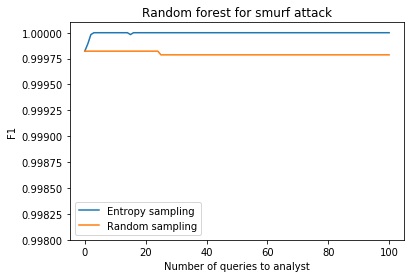

In [84]:
ni.plot_active_learning_time_series_overlapping(
    attribute='f1', label='smurf',
    learner1='RandomForestClassifier', sampling1='entropy',
    learner2='RandomForestClassifier', sampling2='random',
    title='Random forest for smurf attack',
    ylim=[0.9980, 1.0001], ylabel='F1',
    legend=['Entropy sampling', 'Random sampling']
)

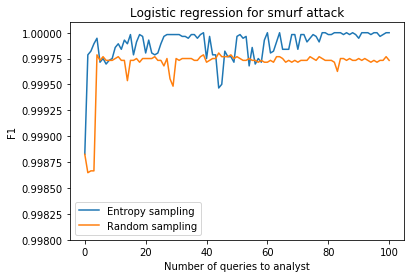

In [68]:
ni.plot_active_learning_time_series_overlapping(
    attribute='f1', label='smurf',
    learner1='LogisticRegression', sampling1='entropy',
    learner2='LogisticRegression', sampling2='random',
    title='Logistic regression for smurf attack',
    ylim=[0.9980, 1.0001], ylabel='F1',
    legend=['Entropy sampling', 'Random sampling']
)

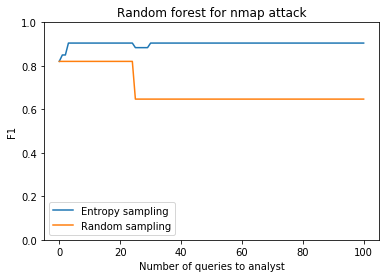

In [62]:
ni.plot_active_learning_time_series_overlapping(
    attribute='f1', label='nmap',
    learner1='RandomForestClassifier', sampling1='entropy',
    learner2='RandomForestClassifier', sampling2='random',
    title='Random forest for nmap attack',
    ylim=[0, 1], ylabel='F1',
    legend=['Entropy sampling', 'Random sampling']
)

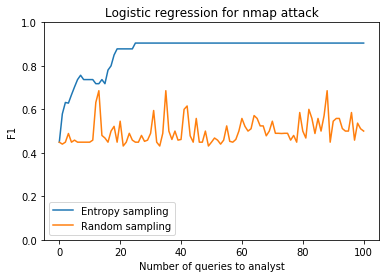

In [61]:
ni.plot_active_learning_time_series_overlapping(
    attribute='f1', label='nmap',
    learner1='LogisticRegression', sampling1='entropy',
    learner2='LogisticRegression', sampling2='random',
    title='Logistic regression for nmap attack',
    ylim=[0, 1], ylabel='F1',
    legend=['Entropy sampling', 'Random sampling']
)

## Ensemble

In [9]:
df_ensemble = ni.report_ensemble()

Label: smurf., learner: VotingClassifier, sampling strategy: entropy_sampling
Already exists in cache, returning...
Label: neptune., learner: VotingClassifier, sampling strategy: entropy_sampling
Already exists in cache, returning...
Label: back., learner: VotingClassifier, sampling strategy: entropy_sampling
Already exists in cache, returning...
Label: satan., learner: VotingClassifier, sampling strategy: entropy_sampling
Already exists in cache, returning...
Label: ipsweep., learner: VotingClassifier, sampling strategy: entropy_sampling
Already exists in cache, returning...
Label: portsweep., learner: VotingClassifier, sampling strategy: entropy_sampling
Already exists in cache, returning...
Label: warezclient., learner: VotingClassifier, sampling strategy: entropy_sampling
Already exists in cache, returning...
Label: teardrop., learner: VotingClassifier, sampling strategy: entropy_sampling
Already exists in cache, returning...
Label: pod., learner: VotingClassifier, sampling strateg

In [10]:
df_ensemble

,initial_FN,initial_FP,initial_f1,initial_precision,initial_recall,label,learner,sample_100_FN,sample_100_FP,sample_100_f1,sample_100_precision,sample_100_recall,sample_10_FN,sample_10_FP,sample_10_f1,sample_10_precision,sample_10_recall,sample_1_FN,sample_1_FP,sample_1_f1,sample_1_precision,sample_1_recall,sample_25_FN,sample_25_FP,sample_25_f1,sample_25_precision,sample_25_recall,sample_50_FN,sample_50_FP,sample_50_f1,sample_50_precision,sample_50_recall,sampling strategy
0,8867,0,0.812501,1.00000,0.684212,smurf.,VotingClassifier,8867,0,0.812501,1.0,0.684212,8867,0,0.812501,1.000000,0.684212,8867,0,0.812501,1.000000,0.684212,8867,0,0.812501,1.000000,0.684212,8867,0,0.812501,1.000000,0.684212,entropy_sampling
0,4487,0,0.735327,1.00000,0.581437,neptune.,VotingClassifier,4487,0,0.735327,1.0,0.581437,4487,0,0.735327,1.000000,0.581437,4487,0,0.735327,1.000000,0.581437,4487,0,0.735327,1.000000,0.581437,4487,0,0.735327,1.000000,0.581437,entropy_sampling
0,10,0,0.976744,1.00000,0.954545,back.,VotingClassifier,10,0,0.976744,1.0,0.954545,10,0,0.976744,1.000000,0.954545,11,0,0.974359,1.000000,0.950000,10,0,0.976744,1.000000,0.954545,11,0,0.974359,1.000000,0.950000,entropy_sampling
0,159,0,0.000000,0.00000,0.000000,satan.,VotingClassifier,143,0,0.182857,1.0,0.100629,148,0,0.129412,1.000000,0.069182,159,0,0.000000,0.000000,0.000000,143,0,0.182857,1.000000,0.100629,143,0,0.182857,1.000000,0.100629,entropy_sampling
0,4,0,0.983740,1.00000,0.968000,ipsweep.,VotingClassifier,0,0,1.000000,1.0,1.000000,1,0,0.995984,1.000000,0.992000,4,0,0.983740,1.000000,0.968000,1,0,0.995984,1.000000,0.992000,1,0,0.995984,1.000000,0.992000,entropy_sampling
0,38,0,0.776471,1.00000,0.634615,portsweep.,VotingClassifier,38,0,0.776471,1.0,0.634615,39,0,0.769231,1.000000,0.625000,39,0,0.769231,1.000000,0.625000,38,0,0.776471,1.000000,0.634615,38,0,0.776471,1.000000,0.634615,entropy_sampling
0,22,2,0.869565,0.97561,0.784314,warezclient.,VotingClassifier,9,0,0.953846,1.0,0.911765,10,1,0.943590,0.989247,0.901961,18,2,0.893617,0.976744,0.823529,10,2,0.938776,0.978723,0.901961,9,1,0.948980,0.989362,0.911765,entropy_sampling
0,22,0,0.873563,1.00000,0.775510,teardrop.,VotingClassifier,15,0,0.917127,1.0,0.846939,15,0,0.917127,1.000000,0.846939,19,0,0.892655,1.000000,0.806122,18,0,0.898876,1.000000,0.816327,15,0,0.917127,1.000000,0.846939,entropy_sampling
0,7,0,0.844444,1.00000,0.730769,pod.,VotingClassifier,3,0,0.938776,1.0,0.884615,3,0,0.938776,1.000000,0.884615,6,0,0.869565,1.000000,0.769231,3,0,0.938776,1.000000,0.884615,3,0,0.938776,1.000000,0.884615,entropy_sampling
0,7,0,0.820513,1.00000,0.695652,nmap.,VotingClassifier,4,0,0.904762,1.0,0.826087,4,0,0.904762,1.000000,0.826087,6,0,0.850000,1.000000,0.739130,4,1,0.883721,0.950000,0.826087,4,0,0.904762,1.000000,0.826087,entropy_sampling


In [71]:
df_ensemble.groupby(['learner', 'sampling strategy']).agg([np.mean, np.std]).round(2)

initial_FN          initial_FP        \
                                         mean      std       mean   std   
learner          sampling strategy                                        
VotingClassifier entropy_sampling      1362.3  2985.64        0.2  0.63   

                                   initial_f1       initial_precision        \
                                         mean   std              mean   std   
learner          sampling strategy                                            
VotingClassifier entropy_sampling        0.77  0.28               0.9  0.32   

                                   initial_recall       sample_100_FN  \
                                             mean   std          mean   
learner          sampling strategy                                      
VotingClassifier entropy_sampling            0.68  0.27        1357.6   

                                            sample_100_FP      sample_100_f1  \
                                        std          mean  std          mean   
learner          sampling strategy                                             
VotingClassifier entropy_sampling   2987.91             0  0.0          0.82   

                                         sample_100_precision       \
                                     std                 mean  std   
learner          sampling strategy                                   
VotingClassifier entropy_sampling   0.24                  1.0  0.0   

                                   sample_100_recall       sample_10_FN  \
                                                mean   std         mean   
learner          sampling strategy                                        
VotingClassifier entropy_sampling               0.74  0.26       1358.4   

                                            sample_10_FP       sample_10_f1  \
                                        std         mean   std         mean   
learner          sampling strategy                                            
VotingClassifier entropy_sampling   2987.53          0.1  0.32         0.81   

                                         sample_10_precision       \
                                     std                mean  std   
learner          sampling strategy                                  
VotingClassifier entropy_sampling   0.26                 1.0  0.0   

                                   sample_10_recall       sample_1_FN  \
                                               mean   std        mean   
learner          sampling strategy                                      
VotingClassifier entropy_sampling              0.74  0.27      1361.6   

                                            sample_1_FP       sample_1_f1  \
                                        std        mean   std        mean   
learner          sampling strategy                                          
VotingClassifier entropy_sampling   2985.99         0.2  0.63        0.78   

                                         sample_1_precision        \
                                     std               mean   std   
learner          sampling strategy                                  
VotingClassifier entropy_sampling   0.28                0.9  0.32   

                                   sample_1_recall       sample_25_FN  \
                                              mean   std         mean   
learner          sampling strategy                                      
VotingClassifier entropy_sampling             0.69  0.27       1358.1   

                                            sample_25_FP       sample_25_f1  \
                                        std         mean   std         mean   
learner          sampling strategy                                            
VotingClassifier entropy_sampling   2987.66          0.3  0.67         0.81   

                                         sample_25_precision        \
                                     std                mean   std  

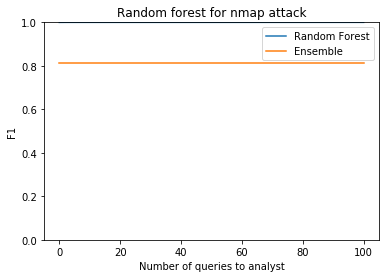

In [88]:
ni.plot_active_learning_time_series_overlapping(
    attribute='f1', label='smurf',
    learner1='RandomForestClassifier', sampling1='entropy',
    learner2='VotingClassifier', sampling2='entropy',
    title='Random forest for nmap attack',
    ylim=[0, 1], ylabel='F1',
    legend=['Random Forest', 'Ensemble']
)

In [102]:
from sklearn.ensemble import RandomForestClassifier, IsolationForest

In [95]:
clf = RandomForestClassifier()

In [96]:
clf.fit(ni.splits['smurf.']['x_train'], ni.splits['smurf.']['y_train'])

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [101]:
clf.predict(ni.splits['smurf.']['x_dev'])

array([ True,  True,  True, ...,  True,  True, False])

In [104]:
iforest = IsolationForest(contamination=0.1)
iforest.fit(ni.splits['smurf.']['x_train'], )

TypeError: fit() got an unexpected keyword argument 'contamination'